#  Análisis Exploratorio de Series de Tiempo (EDA) - Superstore

**Objetivo:** Analizar el dataset "Superstore" para identificar patrones de tendencia y estacionalidad. Esta es la justificación para seleccionar el modelo de pronóstico SARIMA.

---

## 1. Configuración e Importación

Primero, importamos las librerías y nuestro módulo `forecasting_model`.

**IMPORTANTE:** Como este notebook está en la carpeta `/notebooks`, debemos añadir la carpeta raíz del proyecto al `sys.path` de Python para que pueda encontrar el módulo `src`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import sys
import os

# --- Configuración de Path para importar nuestro módulo ---
# Añade el directorio raíz (un nivel arriba de 'notebooks') al path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
# ---------------------------------------------------------

# Importar nuestras funciones del módulo 'src'
from src.forecasting_model import load_data, aggregate_sales

# Configuración de estilo para los gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

print(f"Ruta del proyecto añadida: {project_root}")
print("Librerías y módulo cargados exitosamente.")

Ruta del proyecto añadida: c:\Users\Usuario\Downloads\Seminario\Proyecto_seminario
Librerías y módulo cargados exitosamente.


## 2. Carga y Agregación de Datos

Cargamos los datos usando nuestra función `load_data()` y los agregamos a una frecuencia mensual (`'M'`) para el análisis macro.

In [4]:
# Cargar los datos crudos
df_raw, status = load_data()
if df_raw is None:
    print(f"Error al cargar datos: {status}")
else:
    print(f"Datos cargados exitosamente. {df_raw.shape[0]} filas encontradas.")

# Agregar ventas a nivel mensual (general, sin filtros)
ts_monthly, available = aggregate_sales(df_raw, "All Categories", "All Regions")

if available:
    print(f"Datos agregados mensualmente. Rango de fechas: {ts_monthly.index.min()} a {ts_monthly.index.max()}")
else:
    print("No se pudieron agregar los datos.")

Datos cargados exitosamente. 9994 filas encontradas.
Datos agregados mensualmente. Rango de fechas: 2014-01-31 00:00:00 a 2017-12-31 00:00:00


## 3. Visualización de la Serie de Tiempo

Graficamos las ventas mensuales totales para observar patrones visuales.

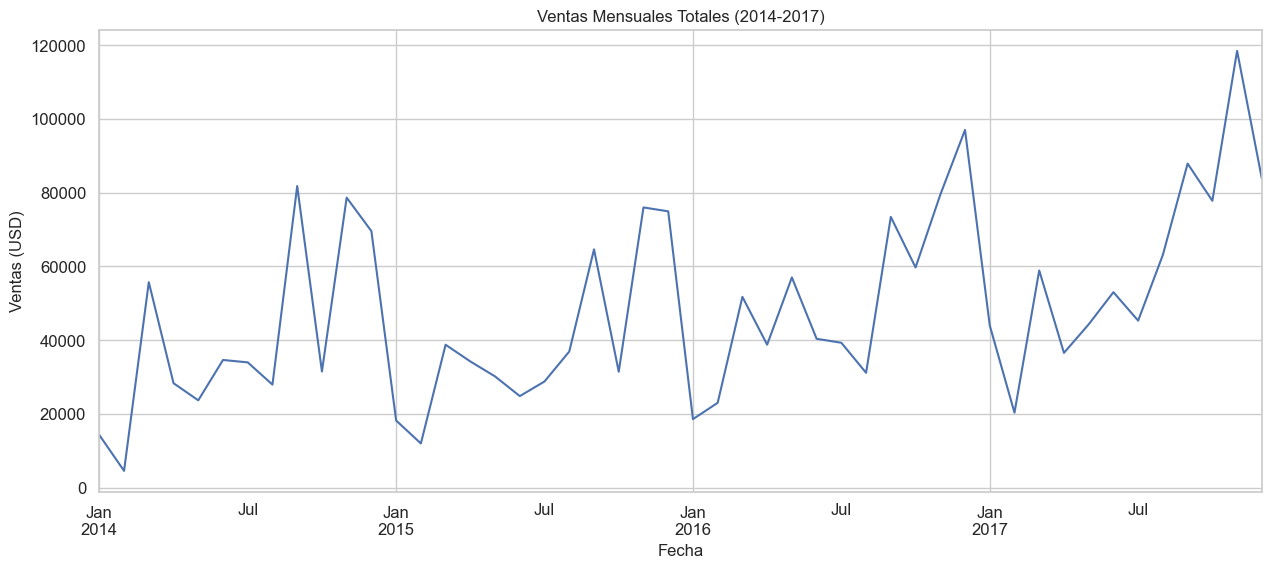

In [5]:
if available:
    plt.figure(figsize=(15, 6))
    ts_monthly.plot(title='Ventas Mensuales Totales (2014-2017)', fontsize=12)
    plt.xlabel('Fecha', fontsize=12)
    plt.ylabel('Ventas (USD)', fontsize=12)
    plt.show()
else:
    print("No hay datos para graficar.")

## 4. Descomposición de la Serie de Tiempo

Este es el análisis central. Usamos la descomposición estacional de `statsmodels` para separar la serie en sus componentes principales.

Usamos un modelo **"multiplicativo"** porque la magnitud de los picos estacionales parece aumentar a medida que la tendencia general sube (es decir, el pico de Navidad en 2017 es mucho más grande que el de 2014).

Descomposición completada. Mostrando componentes...


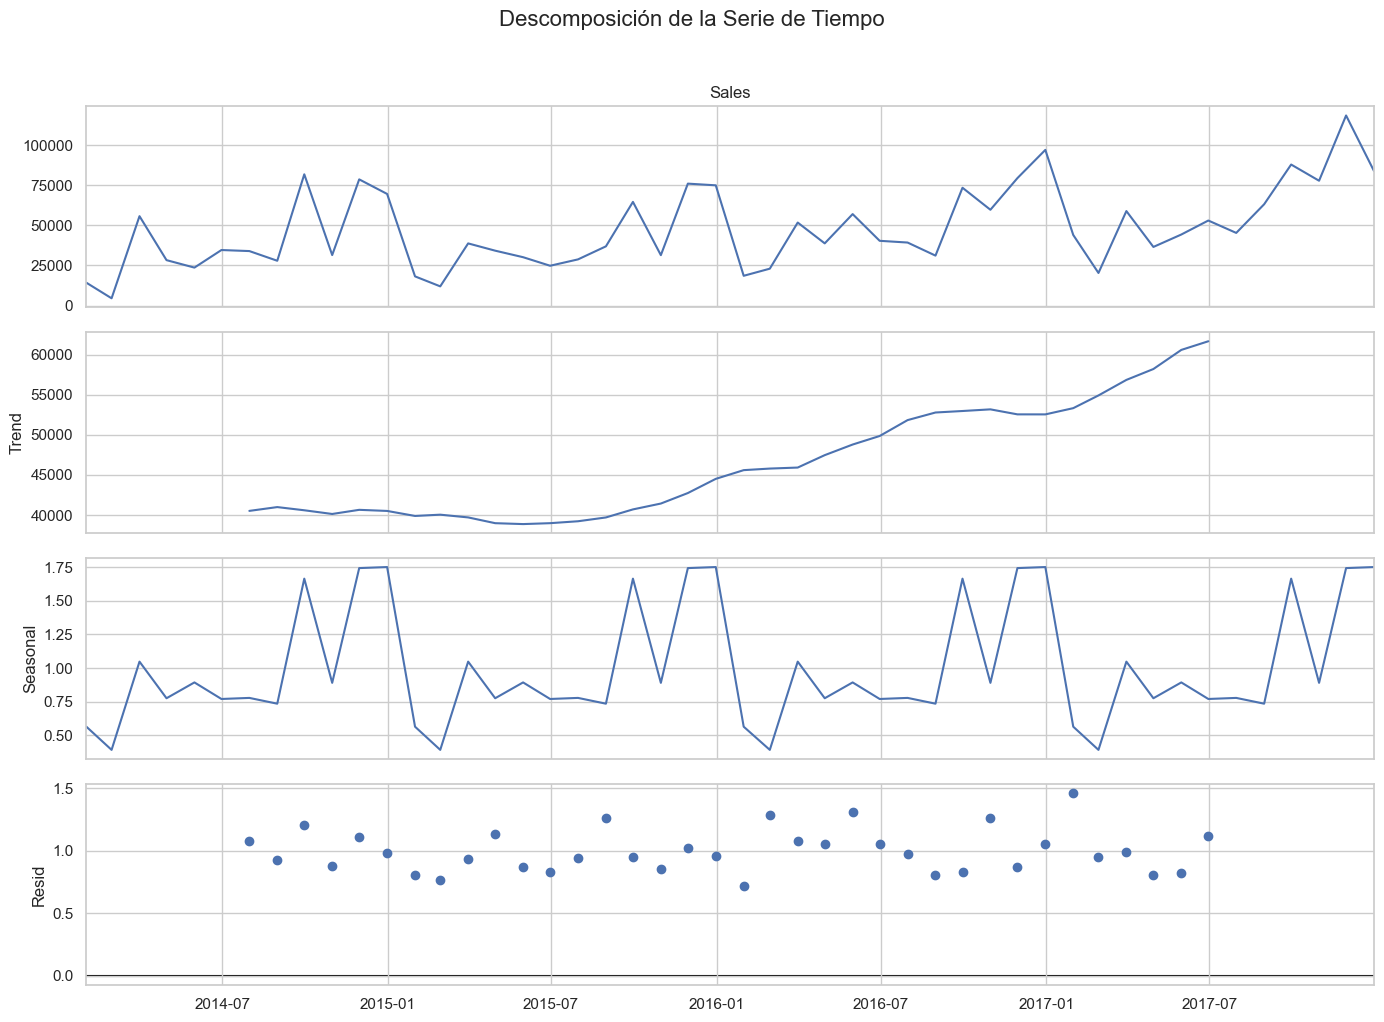

In [6]:
if available:
    # Asegurarse de que haya suficientes datos (al menos 2 ciclos completos)
    if len(ts_monthly) > 24:
        # period=12 porque vemos un ciclo anual (12 meses)
        decomposition = seasonal_decompose(ts_monthly, model='multiplicative', period=12)
        
        print("Descomposición completada. Mostrando componentes...")
        
        # Graficar los 4 componentes
        fig = decomposition.plot()
        fig.set_size_inches(14, 10)
        fig.suptitle('Descomposición de la Serie de Tiempo', y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

    else:
        print("No hay suficientes datos para una descomposición estacional de 12 meses.")

## 5. Conclusión del Análisis

Los gráficos de descomposición de la celda anterior confirman científicamente nuestras observaciones visuales iniciales:

1.  **Componente de Tendencia:** El gráfico de "Trend" muestra una línea ascendente clara y suave. Esto valida que el mercado de la tienda está en crecimiento constante.
2.  **Componente Estacional:** El gráfico de "Seasonal" muestra un patrón que se repite perfectamente cada 12 meses (un ciclo por año), con picos marcados al final del año (Q4) y valles al inicio (Q1).

### Justificación del Modelo

Dado que la serie de tiempo exhibe tanto una **Tendencia (T)** clara como una **Estacionalidad (S)** fuerte y predecible, un modelo simple (como una regresión lineal) no sería adecuado.

El modelo **SARIMA** (Seasonal AutoRegressive Integrated Moving Average) está diseñado específicamente para manejar series de tiempo con estos dos componentes. El análisis confirma que la estacionalidad es anual, justificando plenamente el uso del parámetro `S=12` (un período estacional de 12 meses) en el modelo de pronóstico que hemos implementado en nuestro API.